In [8]:
#Showing directories’ size

import os, shutil

train_dir ='./images/train'
validation_dir = './images/val'
test_dir = './images/test'

train_corona_dir = './images/train/Corona_Virus_Disease'
train_normal_dir = './images/train/Normal'
train_tuberculosis_dir = './images/train/Tuberculosis'

val_corona_dir = './images/val/Corona_Virus_Disease'
val_normal_dir = './images/val/Normal'
val_tuberculosis_dir = './images/val/Tuberculosis'

test_corona_dir = './images/test/Corona_Virus_Disease'
test_normal_dir = './images/test/Normal'
test_tuberculosis_dir = './images/test/Tuberculosis'


print('total training corona images:', len(os.listdir(train_corona_dir)))
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total training tuberculosis images:', len(os.listdir(train_tuberculosis_dir)))


print('total validation corona images:', len(os.listdir(val_corona_dir)))
print('total validation normal images:', len(os.listdir(val_normal_dir)))
print('total validation tuberculosis images:', len(os.listdir(val_tuberculosis_dir)))


print('total testing corona images:', len(os.listdir(test_corona_dir)))
print('total testing normal images:', len(os.listdir(test_normal_dir)))
print('total validation tuberculosis images:', len(os.listdir(val_tuberculosis_dir)))

total training corona images: 1218
total training normal images: 1207
total training tuberculosis images: 1220
total validation corona images: 406
total validation normal images: 402
total validation tuberculosis images: 406
total testing corona images: 407
total testing normal images: 404
total validation tuberculosis images: 406


In [14]:
# Preprocessing the data

from keras.utils import image_dataset_from_directory

IMG_SIZE = 150
train_dataset = image_dataset_from_directory(
train_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
validation_dataset = image_dataset_from_directory(
validation_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
test_dataset = image_dataset_from_directory(
test_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)

Found 3645 files belonging to 3 classes.
Found 1214 files belonging to 3 classes.
Found 1219 files belonging to 3 classes.


In [20]:
# The shape of each batch
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


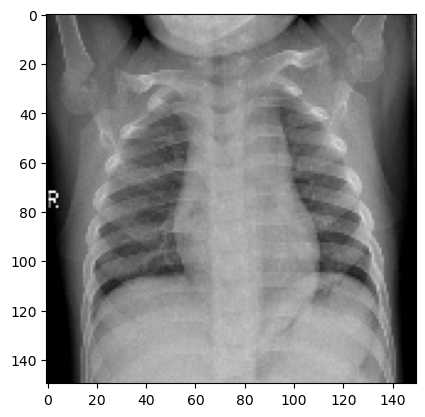

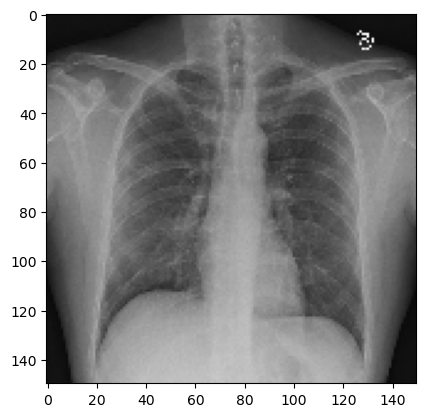

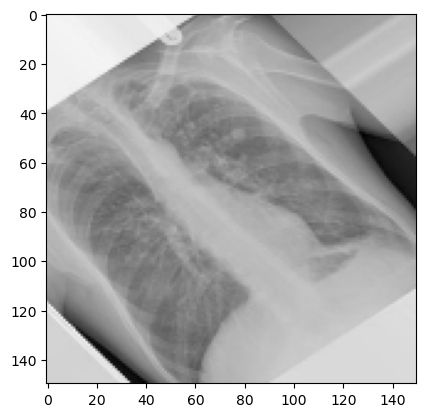

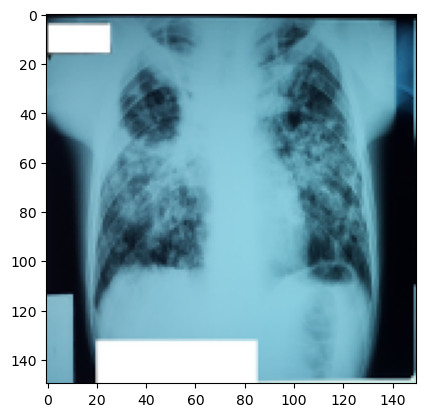

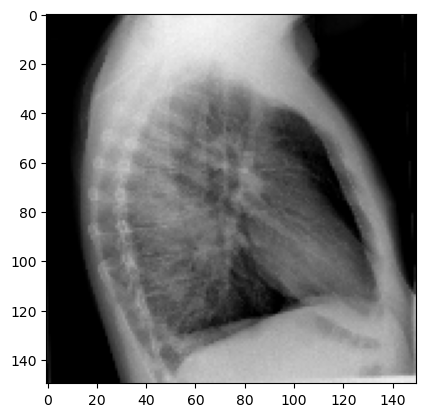

2024-05-29 18:51:04.884727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [30]:
#Viewing the first 5 images of the first batch
import matplotlib.pyplot as plt
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [101]:
# Creating the neural network
from tensorflow import keras
from keras import layers
from keras import models
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(3, activation="softmax")(x) #puse softmax porque son mas de dos clases 
# y 3 capas densas porque son 3 clases
model = keras.Model(inputs=inputs, outputs=outputs)

In [103]:
# Compiling the neural network
import tensorflow as tf
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc'])

In [70]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)

Epoch 1/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 43s 372ms/step - acc: 0.3511 - loss: 1.0986 - val_acc: 0.3369 - val_loss: 1.0985
Epoch 2/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 49s 432ms/step - acc: 0.3326 - loss: 1.0986 - val_acc: 0.3484 - val_loss: 1.0986
Epoch 3/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 48s 421ms/step - acc: 0.3241 - loss: 1.0987 - val_acc: 0.3213 - val_loss: 1.0988
Epoch 4/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 51s 446ms/step - acc: 0.3280 - loss: 1.0987 - val_acc: 0.3278 - val_loss: 1.0987
Epoch 5/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 48s 422ms/step - acc: 0.3245 - loss: 1.0989 - val_acc: 0.3336 - val_loss: 1.0987
Epoch 6/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 50s 435ms/step - acc: 0.3288 - loss: 1.0988 - val_acc: 0.3451 - val_loss: 1.0986
Epoch 7/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 48s 420ms/step - acc: 0.3329 - loss: 1.0988 - val_acc: 0.3245 - val_loss: 1.0987
Epoch 8/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 54s 475ms/step - acc: 0.3336 - loss: 1.0987 - val_acc: 0.3254 - val_loss: 1.0986
Epoch 9/30
114/114 ━━━━━━━━━━━━━

In [76]:
model.save('./Model_S.h5')

In [78]:
from tensorflow import keras
model = keras.models.load_model('./Model_S.h5')

In [80]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('val_acc:', val_acc)

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - acc: 0.3344 - loss: 1.0986
val_acc: 0.33360791206359863


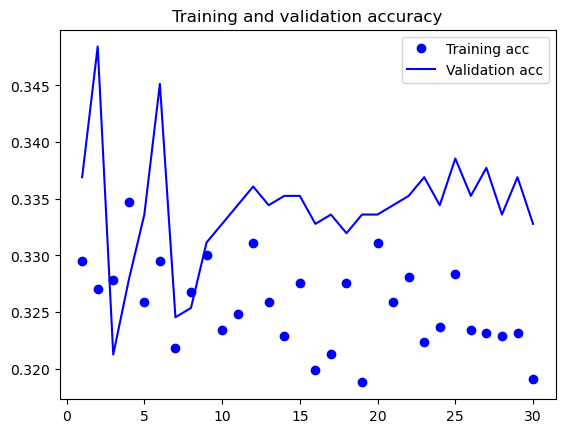

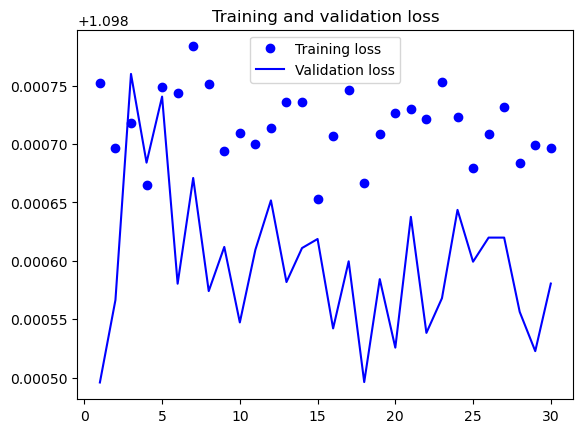

In [84]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show() 